<a href="https://colab.research.google.com/github/Dilpreet-S/AIT-590-Programming-Assignments/blob/master/NLPProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Understanding Data**


In [212]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [213]:
data= pd.read_csv("/content/sentiment_result_updated.csv")

data1= pd.read_csv("/content/sentiment_result_updated.csv")

In [214]:
data.shape

(171659, 18)

In [215]:
data.head()

,Category,Reservation,Noise Level,WiFi,Trendy,Upscale,Casual,Good For Groups,Good For Kids,Alcohol,Delivery,Takeout,Price Range,Emotion,WiFi T/F,Alcohol T/F,Unnamed: 16,Unnamed: 17
0,nightlife,True,average,free,False,False,True,True,True,full bar,False,True,2.0,negative,True,True,NaN,NaN
1,american,True,average,free,False,False,True,True,True,full bar,False,True,2.0,negative,True,True,NaN,NaN
2,bars,True,average,free,False,False,True,True,True,full bar,False,True,2.0,negative,True,True,NaN,NaN
3,sandwiches,False,loud,no,False,False,True,True,True,no,False,True,1.0,neutral,False,False,NaN,NaN
4,sandwiches,False,average,no,False,False,True,True,True,no,True,True,1.0,neutral,False,False,NaN,NaN


In [216]:
# Removing Unwanted Column

data=data.drop(columns=['Unnamed: 16','Unnamed: 17','WiFi','Alcohol'])
data1=data1.drop(columns=['Unnamed: 16','Unnamed: 17'])


In [217]:
data.shape

(171659, 14)

In [218]:
data.dtypes

Category            object
Reservation         object
Noise Level         object
Trendy              object
Upscale             object
Casual              object
Good For Groups     object
Good For Kids       object
Delivery            object
Takeout             object
Price Range        float64
Emotion             object
WiFi T/F            object
Alcohol T/F         object
dtype: object

** Missing Values**

In [219]:
import missingno as msno

In [220]:
data.isna().sum()

Category               0
Reservation         3007
Noise Level         4870
Trendy             10424
Upscale             7720
Casual              6997
Good For Groups     2061
Good For Kids       1210
Delivery            5328
Takeout             2728
Price Range          836
Emotion                0
WiFi T/F            3759
Alcohol T/F         2775
dtype: int64

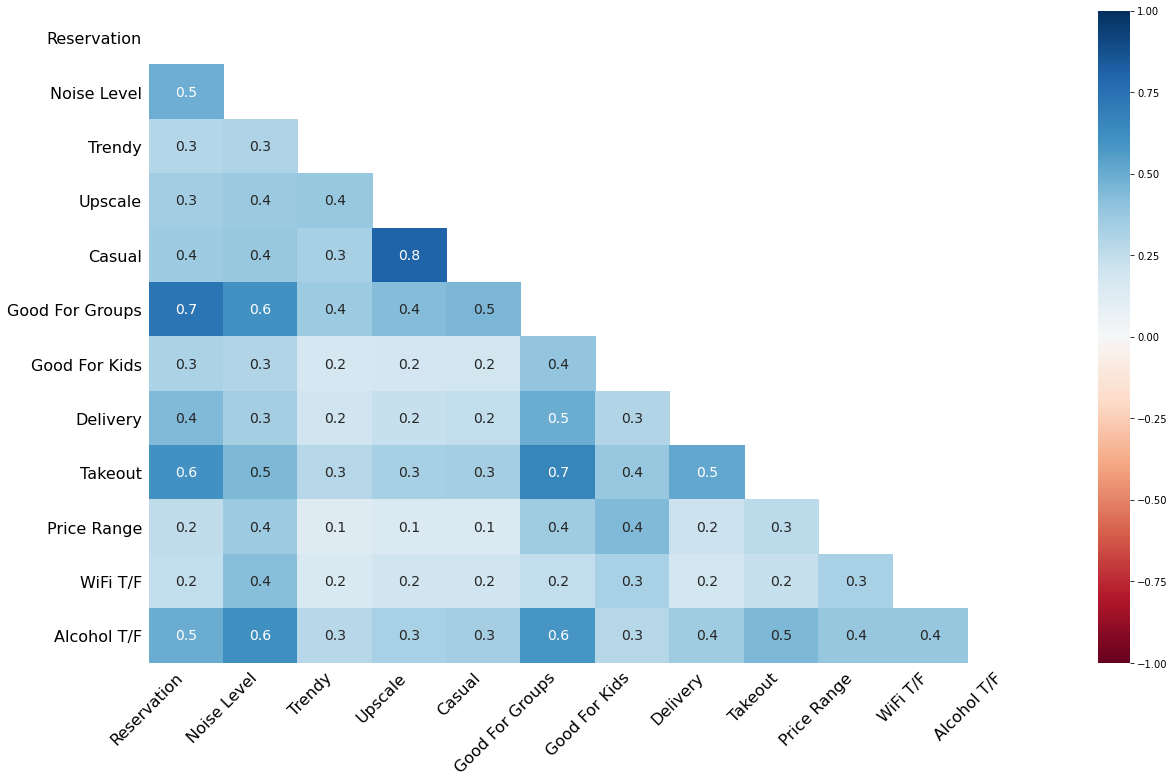

In [221]:
msno.heatmap(data)

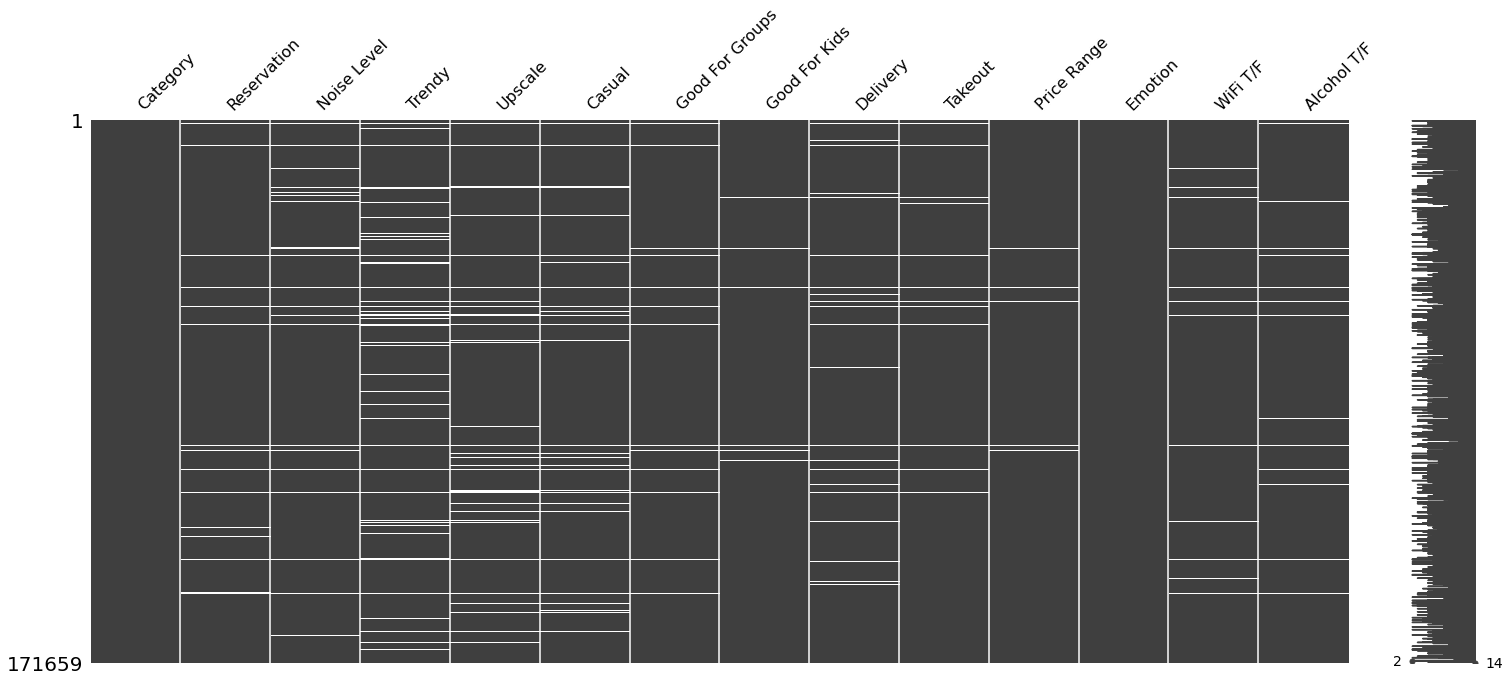

In [222]:
msno.matrix(data)

In [223]:
data=data.dropna(axis=0)
data1=data1.dropna(axis=0)

In [224]:
data.shape

(147581, 14)

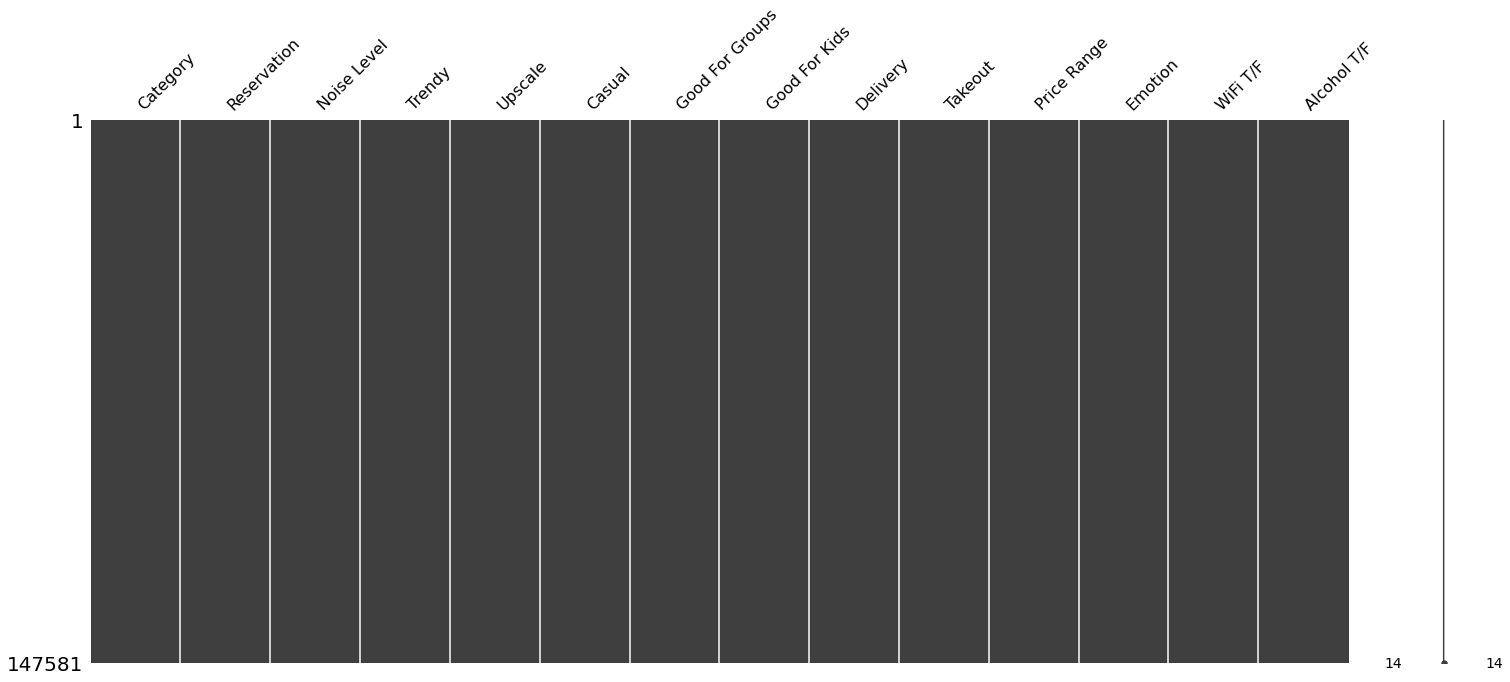

In [225]:
msno.matrix(data)

In [226]:
# Converting Categorical data to numeric data

data['Reservation']=data['Reservation'].map(lambda i:0 if i== 'False' else 1)
data['Trendy']=data['Trendy'].map(lambda i:0 if i== 'False' else 1)
data['Upscale']=data['Upscale'].map(lambda i:0 if i== 'False' else 1)
data['Casual']=data['Casual'].map(lambda i:0 if i== 'False' else 1)
data['Good For Groups']=data['Good For Groups'].map(lambda i:0 if i== 'False' else 1)
data['Good For Kids']=data['Good For Kids'].map(lambda i:0 if i== 'False' else 1)
data['Delivery']=data['Delivery'].map(lambda i:0 if i== 'False' else 1)
data['Takeout']=data['Takeout'].map(lambda i:0 if i== 'False' else 1)
data['WiFi T/F']=data['WiFi T/F'].map(lambda i:0 if i== 'False' else 1)
data['Alcohol T/F']=data['Alcohol T/F'].map(lambda i:0 if i== 'False' else 1)



In [227]:
# For Noise Level and Price I have Normalised both that is range is 0-1

In [228]:
#Noise level
# As logic is the more loud the less numerical weightage, that is number so very loud is 0
data['Noise Level'] = data['Noise Level'].map({'very loud': 0, 'loud': 1, 'average': 2, 'quiet': 3})
 
data['Noise Level']=(data['Noise Level']-data['Noise Level'].min())/(data['Noise Level'].max()-data['Noise Level'].min())     

In [229]:
# Price 
# The more the price the less numeric weightage, so 4 =0
data['Price Range'] = data['Price Range'].map({4: 0, 3: 1, 2: 2, 1: 3})

data['Price Range']=(data['Price Range']-data['Price Range'].min())/(data['Price Range'].max()-data['Price Range'].min())

In [230]:
data.dtypes

Category            object
Reservation          int64
Noise Level        float64
Trendy               int64
Upscale              int64
Casual               int64
Good For Groups      int64
Good For Kids        int64
Delivery             int64
Takeout              int64
Price Range        float64
Emotion             object
WiFi T/F             int64
Alcohol T/F          int64
dtype: object

**EDA**

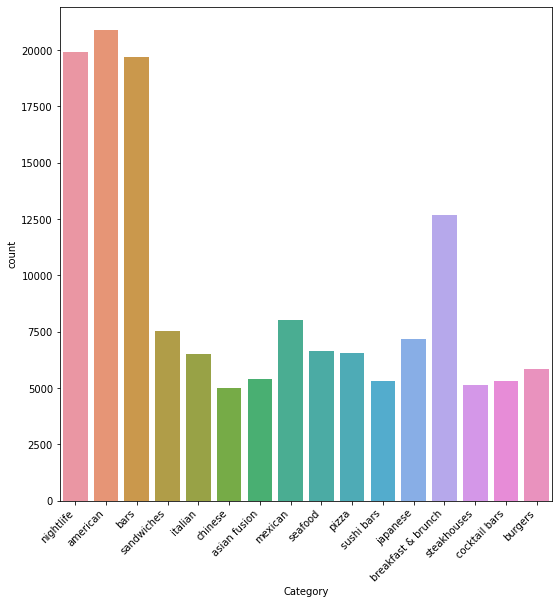

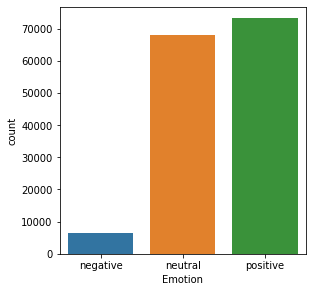

In [231]:
#Category

fig = plt.figure(figsize = (30,20))
ax1 = fig.add_subplot(2,3,1)
chart=sns.countplot(data =data1, x = 'Category', ax=ax1)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')

fig = plt.figure(figsize = (15,10))
ax1 = fig.add_subplot(2,3,5)
chart=sns.countplot(data = data1, x = 'Emotion', ax=ax1)

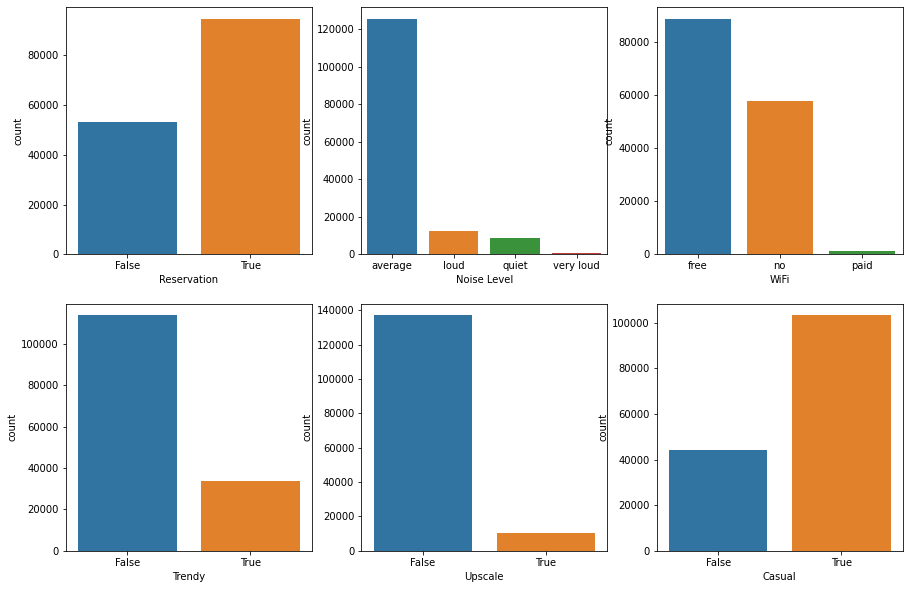

In [250]:
fig = plt.figure(figsize = (15,10))

ax1 = fig.add_subplot(2,3,1)
chart=sns.countplot(data = data1, x = 'Reservation', ax=ax1)

ax1 = fig.add_subplot(2,3,2)
chart=sns.countplot(data = data1, x = 'Noise Level', ax=ax1)

ax1 = fig.add_subplot(2,3,3)
chart=sns.countplot(data = data1, x = 'WiFi', ax=ax1)

ax1 = fig.add_subplot(2,3,4)
chart=sns.countplot(data = data1, x = 'Trendy', ax=ax1)


ax1 = fig.add_subplot(2,3,5)
chart=sns.countplot(data = data1, x = 'Upscale', ax=ax1)


ax1 = fig.add_subplot(2,3,6)
chart=sns.countplot(data = data1, x = 'Casual', ax=ax1)




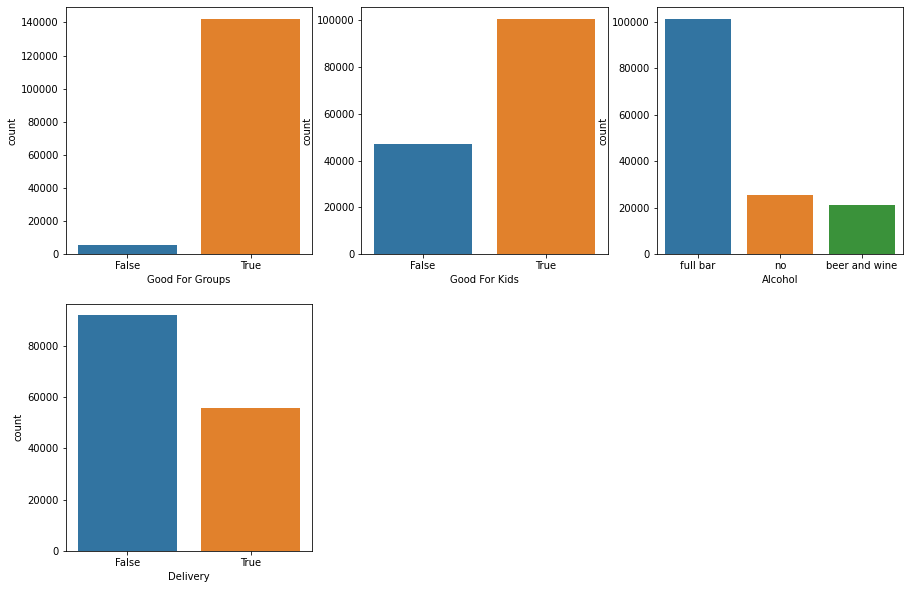

In [262]:
fig = plt.figure(figsize = (15,10))

ax1 = fig.add_subplot(2,3,1)
chart=sns.countplot(data = data1, x = 'Good For Groups', ax=ax1)


ax1 = fig.add_subplot(2,3,2)
chart=sns.countplot(data = data1, x = 'Good For Kids', ax=ax1)

ax1 = fig.add_subplot(2,3,3)
chart=sns.countplot(data = data1, x = 'Alcohol', ax=ax1)


ax1 = fig.add_subplot(2,3,4)
chart=sns.countplot(data = data1, x = 'Delivery', ax=ax1)




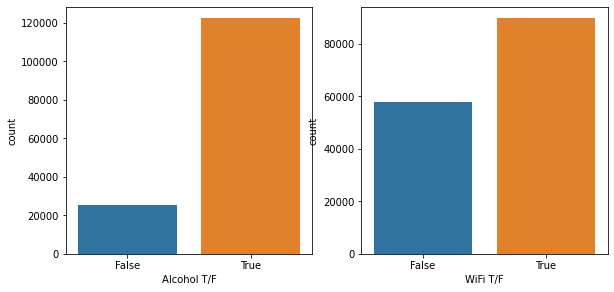

In [257]:
fig = plt.figure(figsize = (15,10))

ax1 = fig.add_subplot(2,3,1)
chart=sns.countplot(data = data1, x = 'Alcohol T/F', ax=ax1)


ax1 = fig.add_subplot(2,3,2)
chart=sns.countplot(data = data1, x = 'WiFi T/F', ax=ax1)


**Model**

In [294]:
#independent and dependent feature
import random

x=data.iloc[:,1:]
y=data.iloc[:,0]

In [295]:
# Performing one hot encoding on Emotion

x=pd.get_dummies(x,drop_first=True)
x.head()

,Reservation,Noise Level,Trendy,Upscale,Casual,Good For Groups,Good For Kids,Delivery,Takeout,Price Range,WiFi T/F,Alcohol T/F,Emotion_neutral,Emotion_positive
0,1,0.666667,1,1,1,1,1,1,1,0.666667,1,1,0,0
1,1,0.666667,1,1,1,1,1,1,1,0.666667,1,1,0,0
2,1,0.666667,1,1,1,1,1,1,1,0.666667,1,1,0,0
3,1,0.333333,1,1,1,1,1,1,1,1.000000,1,1,1,0
4,1,0.666667,1,1,1,1,1,1,1,1.000000,1,1,1,0


In [296]:
y.head()

0     nightlife
1      american
2          bars
3    sandwiches
4    sandwiches
Name: Category, dtype: object

**Random Forest**

In [299]:
random.seed(123)
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
model.fit(x,y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [300]:
print(model.feature_importances_)

[0.         0.23611757 0.         0.         0.         0.
 0.         0.         0.         0.72942023 0.         0.
 0.02011141 0.01435079]


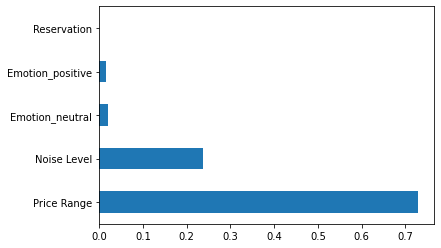

In [301]:

#plot graph of feature importance 

feat_importances= pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

In [302]:
random.seed(123)
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [303]:
print('Train : ', x_train.shape, '\n'
      'Test  : ', x_test.shape)


Train :  (103306, 14) 
Test  :  (44275, 14)


In [311]:
from sklearn import model_selection

random.seed(123)

rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)

# predictions
rfc_predict = rfc.predict(x_test)

In [329]:
from sklearn import metrics  
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, multilabel_confusion_matrix, accuracy_score,recall_score

In [331]:
print("=== Confusion Matrix ===")

print(multilabel_confusion_matrix(y_test, rfc_predict, labels= ["american",
                                  "asian fusion","bars","breakfast & brunch",
                                  "burgers","chinese","cocktail bars","italian",
                                  "japanese","mexican","nightlife","pizza",
                                  "sandwiches","seafood","steakhouses","sushi bars"]))

print('\n')
print("=== Accuracy ===")
print(accuracy_score(y_test,rfc_predict))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test, rfc_predict))


=== Confusion Matrix ===
[[[34553  3505]
  [ 5526   691]]

 [[42640     0]
  [ 1635     0]]

 [[36802  1452]
  [ 5610   411]]

 [[40330   123]
  [ 3788    34]]

 [[42528     0]
  [ 1747     0]]

 [[42806     0]
  [ 1469     0]]

 [[42639     0]
  [ 1636     0]]

 [[42322     0]
  [ 1953     0]]

 [[42125     0]
  [ 2150     0]]

 [[41825     9]
  [ 2436     5]]

 [[12000 26410]
  [ 1400  4465]]

 [[42309     0]
  [ 1966     0]]

 [[37427  4619]
  [ 1291   938]]

 [[42220    41]
  [ 1994    20]]

 [[41637  1138]
  [ 1088   412]]

 [[42663     2]
  [ 1610     0]]]


=== Accuracy ===
0.15756070016939583


=== Classification Report ===


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                    precision    recall  f1-score   support

          american       0.16      0.11      0.13      6217
      asian fusion       0.00      0.00      0.00      1635
              bars       0.22      0.07      0.10      6021
breakfast & brunch       0.22      0.01      0.02      3822
           burgers       0.00      0.00      0.00      1747
           chinese       0.00      0.00      0.00      1469
     cocktail bars       0.00      0.00      0.00      1636
           italian       0.00      0.00      0.00      1953
          japanese       0.00      0.00      0.00      2150
           mexican       0.36      0.00      0.00      2441
         nightlife       0.14      0.76      0.24      5865
             pizza       0.00      0.00      0.00      1966
        sandwiches       0.17      0.42      0.24      2229
           seafood       0.33      0.01      0.02      2014
       steakhouses       0.27      0.27      0.27      1500
        sushi bars       0.00      0.00

**Hyper Parameter tuning**

In [335]:
from sklearn.model_selection import RandomizedSearchCV
# number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 10)]
# number of features at every split
max_features = ['auto', 'sqrt']

# max depth
max_depth = [int(x) for x in np.linspace(50, 500, num = 10)]
max_depth.append(None)
# create random grid
random_grid = {
 'n_estimators': n_estimators,
 'max_features': max_features,
 'max_depth': max_depth
 }
# Random search of parameters
rfc_random = RandomizedSearchCV(estimator = rfc, param_distributions = random_grid, n_iter = 5, cv = 5, verbose=2, random_state=42, n_jobs = 1)
# Fit the model
rfc_random.fit(x_train, y_train)
# print results
print(rfc_random.best_params_)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] n_estimators=522, max_features=sqrt, max_depth=350 ..............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


KeyboardInterrupt: ignored

In [ ]:
rfc = RandomForestClassifier(n_estimators=600, max_depth=300, max_features='sqrt')
rfc.fit(x_train,y_train)
rfc_predict = rfc.predict(x_test)
